Text(0, 0.5, '$f(x)$')

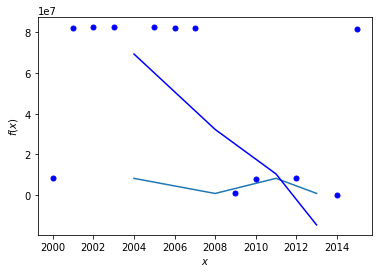

In [8]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)
%matplotlib inline

#def f(x):
#    """The function to predict."""
#    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
#X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
y = np.array([[8221158,
               82349925,
               82488495,
               82534176,
               82469422,
               82376451,
               82266372,
               819237,
               8177693,
               8425823,
               89825,
               81686611
               ]]).reshape(-1,1)
X = np.array([[2000,2001,2002,2003,2005,2006,2007,2009,2010,2012,2014,2015]]).reshape(-1,1)

Y = np.array([[8251626,
               821197,
               8274983,
               864565]]).reshape(-1,1)       
x = np.array([[200,2008,2011,2013]]).reshape(-1,1)


# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(0, 10, 1000)).T
#x = np.array(np.linspace(0, 10, 1000)).reshape(-1,1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()

plt.plot(x, Y,label=r'$f(x) = x\,\sin(x)$')
#actual data 
plt.plot(X, y, 'b.',markersize=10, label='Observations')
#estimate
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.yscale('log')
#plt.ylim(-10, 20)
#plt.legend(loc='upper left')